In [45]:
import sklearn
import shap

In [46]:
X, y = shap.datasets.adult()
X["Occupation"] *= 1000  # to show the impact of feature scale on KNN predictions
X_display, y_display = shap.datasets.adult(display=True)
X_train, X_valid, y_train, y_valid = sklearn.model_selection.train_test_split(
    X, y, test_size=0.2, random_state=7
)
knn = sklearn.neighbors.KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [47]:
def f(x):
    return knn.predict_proba(x)[:, 1]


med = X_train.median().values.reshape((1, X_train.shape[1]))

explainer = shap.Explainer(f, med)
shap_values = explainer(X_valid.iloc[0:1000, :])

H:\feature\.venv11\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
H:\feature\.venv11\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
H:\feature\.venv11\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
H:\feature\.venv11\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
H:\feature\.venv11\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
H:\feature\.venv11\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature

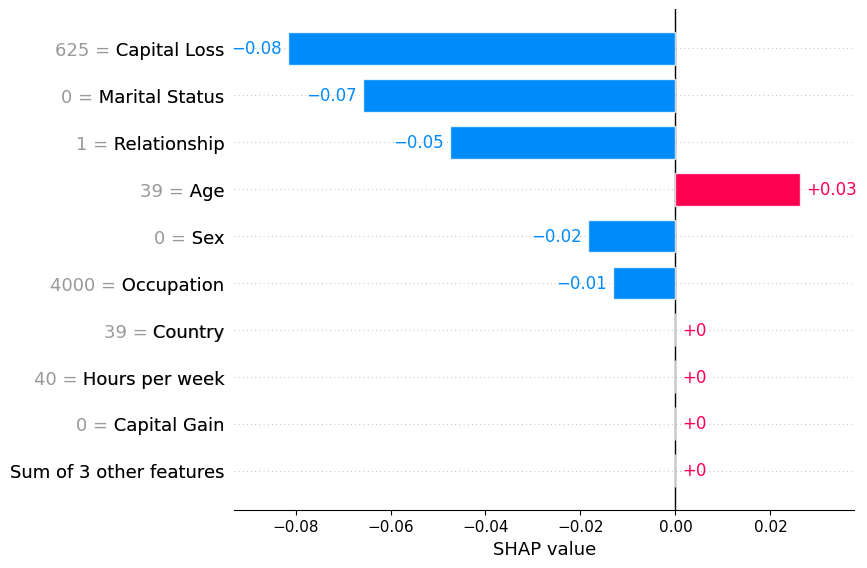

In [50]:
# plot the SHAP values for the Setosa output of the first instance
shap.plots.bar(shap_values[0])

In [51]:
med

array([[3.7e+01, 4.0e+00, 1.0e+01, 2.0e+00, 7.0e+03, 3.0e+00, 4.0e+00,
        1.0e+00, 0.0e+00, 0.0e+00, 4.0e+01, 3.9e+01]])